<a href="https://colab.research.google.com/github/ZhyShe/18ma573ZhiyuanShe/blob/master/src/hw11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZhyShe/18ma573ZhiyuanShe

Cloning into '18ma573ZhiyuanShe'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 492 (delta 49), reused 0 (delta 0), pack-reused 353
Receiving objects: 100% (492/492), 1.73 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (178/178), done.


In [2]:
cd/content/18ma573ZhiyuanShe/src

/content/18ma573ZhiyuanShe/src


In [3]:
ls contract_v01.py

contract_v01.py


In [4]:
ls sde_1d_v01.py

sde_1d_v01.py


In [0]:
from contract_v01 import *
from sde_1d_v01 import *
import matplotlib.pyplot as plt

In [0]:
gbm=Gbm_1d(
    init_state = 100.,
    drift_ratio = 0.05,
    vol_ratio = .2
)

option=VanillaOption(
    otype = 1,
    maturity = 1,
    strike = 100
)
true=gbm.bsm_price(option)

In [15]:
print('The BSM Price is %f'%true)

The BSM Price is 10.450584


In [0]:
import numpy as np

otype=1
K=100
sigma=0.2
S_0=100
r=0.05
T=1
N=2000



In [0]:
def CRR(N=2000, K=100,sigma=0.2, S_0=100, r=0.05, T=1):
  dt=T/N
  dx=sigma*np.sqrt(dt)
  r_hat=r-0.5*sigma**2
  p=(sigma+r_hat*np.sqrt(dt))/(2*sigma)
  
  u=np.exp(dx)
  d=1/u
  
  V_prev=np.zeros(N+1)
  V_current = np.zeros(N+1)
    
  for i in range(N+1):
    V_prev[i]=max(S_0*(u**i)*(d**(N-i))-K,0)*np.exp(-r*T)
  i=N
  while i>0:        
      for j in range(0,i):
          V_current[j] =(1-p)*V_prev[j]+p*V_prev[j+1]
      i=i-1
      V_prev = V_current
        
  return V_prev[0]
    
  
  

In [16]:
print('The Price of CRR(2000) is %f'%CRR())

The Price of CRR(2000) is 10.449552


In [0]:
N=[10+20*k for k in range(50)]
Ys=[]
for n in N:
  Ys.append(CRR(n))

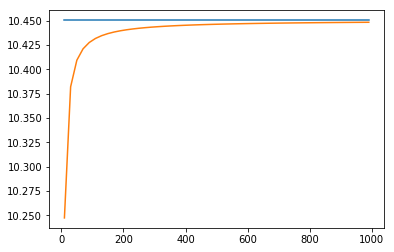

In [12]:
plt.figure()
plt.plot(N,[true]*len(N))
plt.plot(N,Ys)
plt.show()

In [0]:
N=[10+25*k for k in range(50)]
Ys1=[]
for n in N:
  Ys1.append(CRR(n))

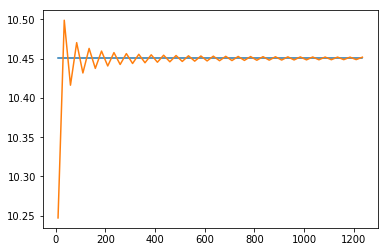

In [14]:
plt.plot(N,[true]*len(N))
plt.plot(N,Ys1)
plt.show()